### Score function is independent of mixing proportions in $p$

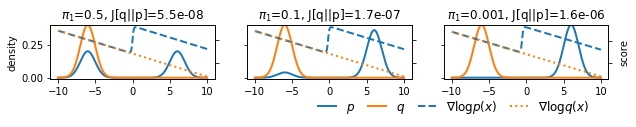

In [359]:
import autograd.numpy as np
from autograd import elementwise_grad as grad
from autograd.scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

x = np.linspace(-10,10,1000)

m1 = -6
m2 = 6
s1 = 1
s2 = 1

def pdf_and_score(c1,c2,m1,m2,s1,s2):
    def pdf1(x): return norm.pdf(x, m1, s1)
    def pdf2(x): return norm.pdf(x, m2, s2)

    def pdf(x): return pdf1(x) * c1 + pdf2(x) * c2


    dlogpdf1 = grad(lambda x: np.log(pdf1(x)))
    dlogpdf2 = grad(lambda x: np.log(pdf2(x)))

    dlogpdf = grad(lambda x: np.log(pdf(x)))
    
    return dlogpdf1, dlogpdf2, dlogpdf, pdf1, pdf2, pdf


fig, axes = plt.subplots(1,3,figsize=(10,1), sharey=True)

for ci, c1 in enumerate([0.5,0.1,1e-3]):
    c2 = 1-c1
    dlogpdf1, dlogpdf2, dlogpdf, pdf1, pdf2, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)

    ax = axes[ci]
    ax2 = ax.twinx()

    h1 = ax.plot(x, pdf(x), "C0", label="p", lw=2)[0]
    h2 = ax.plot(x, pdf1(x), "C1", label="q", lw=2)[0]

    h3 = ax2.plot(x, dlogpdf(x), "C0--", label=r"$s_p(x)$", lw=2)[0]
    h4 = ax2.plot(x, dlogpdf1(x) ,"C1:", label=r"$s_q(x)$", lw=2)[0]
#     h5 = ax2.plot(x, dlogpdf2(x) ,"C2:", label=r"$\nabla\log q(x)$")[0]

    fisher = 0.5 * ((dlogpdf1(x) - dlogpdf(x))**2 * pdf1(x)).sum() * (x[1]-x[0])

    ax2.set_yticklabels([])
    ax.set_title(f"$\pi_1$={c1}, J[q||p]={fisher:.2g}")
    ax.set_ylim([-0.01,0.4])

axes[0].set_ylabel("density")
ax2.set_ylabel("score")

ax.legend([h1,h2,h3,h4], [r"$p$",
                          r"$q$", 
                          r"$\nabla\log p(x)$",
                          r"$\nabla\log q(x)$",
                         ], frameon=False, ncol=5, loc="upper right", bbox_to_anchor=([0.95,-0.15]), 
           fontsize=12, handlelength=1.5, columnspacing=1.1)
fig.savefig("figs/score.pdf", bbox_inches = 'tight',pad_inches = 0.01)

### The Fisher divergence is close to zero even with cracy mixing proportions

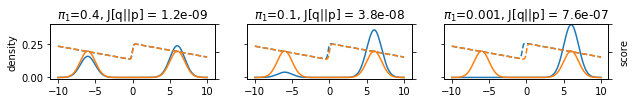

In [362]:
m1 = -6
m2 =6
s1 = 1
s2 = 1

fig, axes = plt.subplots(1,3, figsize=(10,1), sharex=True, sharey=True)

for pii, pi in enumerate([0.4,0.1,0.001]):
    ax = axes[pii]

    c1 = pi
    c2 = 1-c1
    _, _, dlogpdf1, _, _, pdf1 = pdf_and_score(0.5,0.5,m1,m2,s1,s2)
    _, _, dlogpdf, _, _, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)


    ax2 = ax.twinx()

    h1 = ax.plot(x, pdf(x), "C0", label="p")[0]
    h2 = ax.plot(x, pdf1(x), "C1", label="q")[0]


    h3 = ax2.plot(x, dlogpdf(x), "C0--", label=r"$\nabla\log p(x)$")[0]
    h4 = ax2.plot(x, dlogpdf1(x) ,"C1--", label=r"$\nabla\log q(x)$")[0]


    # ax2.set_yticklabels([])
    ax.set_ylim([-0.01,0.4])

    fisher = 0.5 * ((dlogpdf1(x) - dlogpdf(x))**2 * pdf1(x)).sum() * (x[1]-x[0])

    ax.set_title(f"$\pi_1$={c1}, J[q||p] = {fisher:.2g}")
    ax2.set_ylim(-20,20)
    ax2.set_yticklabels([])

# ax.legend([h1,h2,h3,h4], [r"$p$",
#                       r"$q$", 
#                       r"$s_p(x)$",
#                       r"$s_q(x)$",
#                      ], frameon=False, ncol=1, loc = "upper right",
#        fontsize=12, handlelength=1.5, columnspacing=1.1, labelspacing=0.0)
axes[0].set_ylabel("density")
ax2.set_ylabel("score")

fig.savefig(f"figs/score_mix.pdf", bbox_inches = 'tight',pad_inches = 0.1)

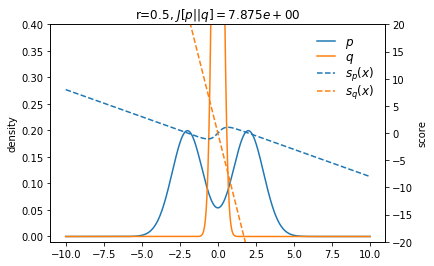

In [400]:
x = np.linspace(-10,10,1000)

m1 = -2
m2 =2
s1 = 1
s2 = 1

fig, ax = plt.subplots(1,1, figsize=(6,4))

c1 = 1
c2 = 1-c1

dlogpdf1, dlogpdf2, dlogpdf, pdf1, pdf2, pdf = pdf_and_score(c1,c2,0,0,0.3,0.3)

c1 = 0.5
c2 = 1-c1
_, dlogpdf2, dlogpdf, _, pdf2, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)

ax2 = ax.twinx()

h1 = ax.plot(x, pdf(x), "C0", label="p")[0]
h2 = ax.plot(x, pdf1(x), "C1", label="q")[0]


h3 = ax2.plot(x, dlogpdf(x), "C0--", label=r"$\nabla\log p(x)$")[0]
h4 = ax2.plot(x, dlogpdf1(x) ,"C1--", label=r"$\nabla\log q(x)$")[0]


# ax2.set_yticklabels([])
ax.set_ylim([-0.01,0.4])

ax.set_ylabel("density")
ax2.set_ylabel("score")

fisher = 0.5 * ((dlogpdf1(x) - dlogpdf(x))**2 * pdf1(x)).sum() * (x[1]-x[0])

ax.set_title(f"r={c1}, $J[p||q] = {fisher:.3e}$")
ax2.set_ylim(-20,20)

ax.legend([h1,h2,h3,h4], [r"$p$",
                      r"$q$", 
                      r"$s_p(x)$",
                      r"$s_q(x)$",
                     ], frameon=False, ncol=1, loc = "upper right",
       fontsize=12, handlelength=1.5, columnspacing=1.1, labelspacing=0.0)
# fig.savefig(f"figs/score_two_gaussian_r{c1}.svg", bbox_inches = 'tight',pad_inches = 0.1)

### Issue of Stein discrepancy

In [369]:
x = np.linspace(-30,30,2000)
dx = x[1]-x[0]

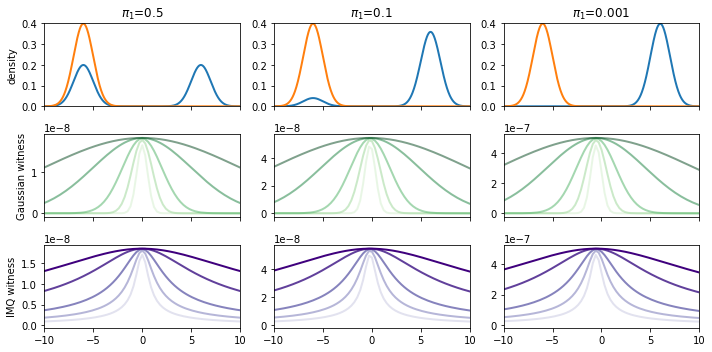

In [370]:
every = 10
fig, axes = plt.subplots(3,3,figsize=(10,5), sharex=True)

sigmas = [0.5,1,2,5,10]
nsigmas = 5

for ci, c1 in enumerate([0.5,0.1,0.001]):
    ax = axes[0, ci]
    c2 = 1-c1
    dlogpdf1, dlogpdf2, dlogpdf, pdf1, pdf2, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)

    l1 = ax.plot(x, pdf(x), "C0", label="p", lw=2)[0]
    l2 = ax.plot(x, pdf1(x), "C1", label="q", lw=2)[0]
    ax.set_title(f"$\pi_1$={c1}")

    
    ax.set_ylim(0.0,0.4)
    
    
    
    sigma = 1.0
    kernel= lambda x, y:  np.exp(-0.5*(x-y)**2 / sigma**2) 
    dkernel= lambda x, y: -np.exp(-0.5*(x-y)**2 / sigma**2) * (x-y) / sigma**2
    
    β = -0.5
    imq_kernel = lambda x,y: (1+(x-y)**2/sigma**2)**(β)
    dimq_kernel = lambda x,y: β*(1+(x-y)**2/sigma**2)**(β-1)*2*(x-y)/sigma**2


    ax = axes[1, ci]
    cmap = plt.get_cmap("Greens")
    
    for i in range(len(sigmas)):
        
        sigma = sigmas[i]
        
        cmap = plt.get_cmap("Greens")
        
        xi = (dlogpdf(x)[:,None] - dlogpdf1(x)[:,None]) * kernel(x[:,None], x[None,:])

        smoothed_score_diff =  (xi).sum(0) * dx
        
        ksd_witness = (pdf1(x)[:,None] * xi).sum(0) * dx

        ax = axes[1, ci]
        ax.plot(x[::every], ksd_witness[::every], color=cmap((1 + i)/nsigmas), lw=2, alpha=0.5)
 

        xi = (dlogpdf(x)[:,None] - dlogpdf1(x)[:,None]) * imq_kernel(x[:,None], x[None,:])

        smoothed_score_diff =  (xi).sum(0) * dx
        
        ksd_witness = (pdf1(x)[:,None] * xi).sum(0) * dx

        cmap = plt.get_cmap("Purples")

        ax = axes[2, ci]
        ax.plot(x[::every], ksd_witness[::every], color=cmap((1 + i)/nsigmas), label=f"$\sigma$={i-1}", lw=2)


        

        
axes[0,0].set_ylabel("density")
axes[1,0].set_ylabel("Gaussian witness")
axes[2,0].set_ylabel("IMQ witness")
ax.set_xlim(-10,10)

# ax.legend([l1,l2]+lines, ["p","q",r"$\sigma$=0.1",r"$\sigma$=1.0", r"$\sigma$=10.0"],
#            frameon=False, ncol=5, loc="upper right", bbox_to_anchor=([0.86,-0.1]), fontsize=13, handlelength=1.5)
fig.tight_layout()
fig.savefig("figs/stein.pdf", bbox_inches = 'tight',pad_inches = 0.01)

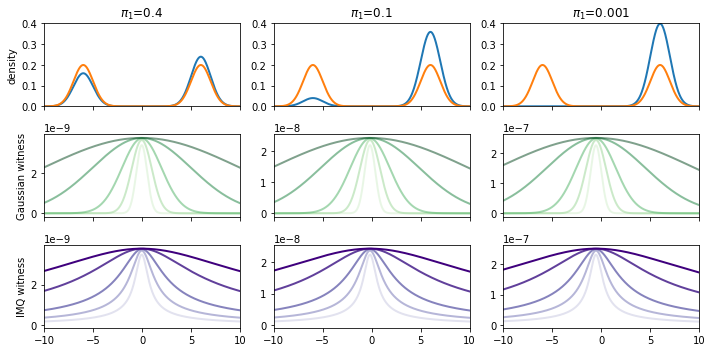

In [353]:

fig, axes = plt.subplots(3,3,figsize=(10,5), sharex=True)

sigmas = [0.5,1,2,5,10]
nsigmas = 5

for ci, c1 in enumerate([0.4,0.1,0.001]):
    ax = axes[0, ci]
    c2 = 1-c1
    
    _, _, dlogpdf, _, _, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)

    _, _, dlogpdf1, _, _, pdf1 = pdf_and_score(0.5,0.5,m1,m2,s1,s2)

    l1 = ax.plot(x, pdf(x), "C0", label="p", lw=2)[0]
    l2 = ax.plot(x, pdf1(x), "C1", label="q", lw=2)[0]

    
    ax.set_ylim(0.0,0.4)
    
    
    
    sigma = 1.0
    kernel= lambda x, y:  np.exp(-0.5*(x-y)**2 / sigma**2) 
    dkernel= lambda x, y: -np.exp(-0.5*(x-y)**2 / sigma**2) * (x-y) / sigma**2
    
    β = -0.5
    imq_kernel = lambda x,y: (1+(x-y)**2/sigma**2)**(β)
    dimq_kernel = lambda x,y: β*(1+(x-y)**2/sigma**2)**(β-1)*2*(x-y)/sigma**2

    ax.set_title(f"$\pi_1$={c1}")


    ax = axes[1, ci]
    cmap = plt.get_cmap("Greens")
    
    for i in range(len(sigmas)):
        
        sigma = sigmas[i]
        
        cmap = plt.get_cmap("Greens")
        
        xi = (dlogpdf(x)[:,None] - dlogpdf1(x)[:,None]) * kernel(x[:,None], x[None,:])

        smoothed_score_diff =  (xi).sum(0) * dx
        
        ksd_witness = (pdf1(x)[:,None] * xi).sum(0) * dx

        ax = axes[1, ci]
        ax.plot(x, ksd_witness, color=cmap((1 + i)/nsigmas), lw=2, alpha=0.5)
 

        xi = (dlogpdf(x)[:,None] - dlogpdf1(x)[:,None]) * imq_kernel(x[:,None], x[None,:])

        smoothed_score_diff =  (xi).sum(0) * dx
        
        ksd_witness = (pdf1(x)[:,None] * xi).sum(0) * dx

        cmap = plt.get_cmap("Purples")

        ax = axes[2, ci]
        ax.plot(x, ksd_witness, color=cmap((1 + i)/nsigmas), label=f"$\sigma$={i-1}", lw=2)



        
axes[0,0].set_ylabel("density")
axes[1,0].set_ylabel("Gaussian witness")
axes[2,0].set_ylabel("IMQ witness")

ax.set_xlim(-10,10)

# ax.legend([l1,l2]+lines, ["p","q",r"$\sigma$=0.1",r"$\sigma$=1.0", r"$\sigma$=10.0"],
#            frameon=False, ncol=5, loc="upper right", bbox_to_anchor=([0.86,-0.1]), fontsize=13, handlelength=1.5)
fig.tight_layout()
fig.savefig("figs/stein_mix.pdf", bbox_inches = 'tight',pad_inches = 0.01)

### Stein variational gradient descent can stuck at a local mode, or have wrong mixing proportion that depends highly on the initial distriubtion. 

In [374]:
c1 = 0.5
c2 = 1-c1
m1, m2 = -5,5
dlogpdf1, dlogpdf2, dlogpdf, pdf1, pdf2, pdf = pdf_and_score(c1,c2,m1,m2,s1,s2)


sigma = 1.0
kernel= lambda x, y:  np.exp(-0.5*(x-y)**2 / sigma) 
dkernel= lambda x, y: - np.exp(-0.5*(x-y)**2 / sigma) * (x-y) / sigma

# kernel = lambda x,y: (1+(x-y)**2)**(-1)
# dkernel = lambda x,y: -0.5*(1+(x-y)**2)**(-2)*2*(x-y)

nsample = 500
samples = np.random.normal(3,1,nsample)
samples_prev = samples.copy()
def stein_grad(samples, x, beta=1):
    return np.nanmean(beta * dlogpdf(samples)[:,None] * kernel(samples[:,None], x[None,:]) + dkernel(samples[:,None], x[None,:]),0)

samples_ms=[]

# means = [-7,-3,-1,1,3,7]
means = [-7,-3,3,7]
stds  = [1,10]

for mi,m in enumerate(means):
    samples_ms.append([])
    for vi, v in enumerate(stds):
        samples = np.random.normal(m,v,nsample)
        samples_prev = samples.copy() 
        grad_acc = 0
        for n in range(500):
#             sigma = 1 + 10 * np.random.rand()
            sample_grad = stein_grad(samples, samples)
#             sample_grad[~np.isfinite(sample_grad)] = 0.0
            samples = samples + sample_grad
        samples_ms[mi].append((samples_prev, samples))
samples_ms = np.asarray(samples_ms)

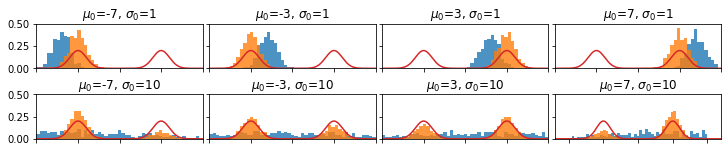

In [379]:
from itertools import product
fig, axes = plt.subplots(len(stds),len(means), figsize=(10,2))
for mi, vi in product(range(len(means)),range(len(stds))):
    ax = axes[vi, mi]
    
    ax.hist(samples_ms[mi, vi, 0], density=True, bins=np.linspace(-10,10,50), alpha=0.8)
    ax.hist(samples_ms[mi, vi, 1], density=True, bins=np.linspace(-10,10,50), alpha=0.8)
    ax.plot(x,pdf(x), "C3")
    ax.set_title(f"$\mu_0$={means[mi]}, $\sigma_0$={stds[vi]}")

    if vi == 0:
        ax.set_ylim([0,0.5])
    if vi == 1:
        ax.set_ylim([0,0.5])
    if vi == 2:
        ax.set_ylim([0,0.5])
        
    if mi > 0:
        ax.set_yticklabels([])
        
    ax.set_xlim([-10,10])
    if vi < 2:
        ax.set_xticklabels([])
        
ax.set_xlim(-12,12)
fig.tight_layout(pad=0.3)
fig.savefig("figs/svgd_even.png", bbox_inches = 'tight', pad_inches = 0.1, dpi=200)